# ATTRITION ANALYSIS

In [1]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('general_data.csv')
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
dataset = dataset.drop_duplicates()
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [4]:
dataset = dataset.dropna()
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


## Replacing STR type data to INT type data

In [5]:
dataset["Attrition"].replace(to_replace=("No","Yes"),value=(0,1),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [6]:
dataset["BusinessTravel"].replace(to_replace=("Travel_Rarely","Travel_Frequently","Non-Travel"),value=(0,1,2),inplace=True)

In [7]:
dataset["Department"].replace(to_replace=("Sales","Research & Development","Human Resources"),value=(0,1,2),inplace=True)

In [8]:
dataset["EducationField"].replace(to_replace=("Life Sciences","Medical","Marketing","Other","Technical Degree"),value=(0,1,2,3,4),inplace=True)

In [9]:
dataset["Gender"].replace(to_replace=("Male","Female"),value=(0,1),inplace=True)

In [10]:
dataset["MaritalStatus"].replace(to_replace=("Married","Single","Divorced"),value=(0,1,2),inplace=True)

In [11]:
dataset["JobRole"].replace(to_replace=("Healthcare Representative","Research Scientist","Sales Executive","Human Resources","Manufacturing Director","Manager","Laboratory Technician","Research Director"),value=(0,1,2,3,4,5,6,7),inplace=True)

In [12]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,0,0,6,2,0,1,1,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,0,1,2,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,3,1,3,0,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,2,1,2,5,0,1,4,0,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,0,1,10,1,1,1,5,0,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [13]:
dataset1=dataset.drop(['StandardHours','EmployeeCount','Over18'],axis=1)

In [14]:
dataset1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,0,0,6,2,0,1,1,1,...,0,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,0,2,1,1,...,1,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,3,3,0,4,...,0,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,2,1,2,5,0,4,0,3,...,0,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,0,1,10,1,1,5,0,1,...,1,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,0,0,4,3,3,4405,1,2,...,1,35390,1.0,18,0,6.0,2,6,1,5
4405,42,0,0,1,5,4,1,4406,1,1,...,1,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0,0,1,2,4,1,4407,0,1,...,2,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0,0,1,25,2,0,4408,0,2,...,0,37020,0.0,20,0,5.0,4,4,1,2


In [15]:
dataset1.mean()

Age                           36.933364
Attrition                      0.160885
BusinessTravel                 0.392743
Department                     0.739160
DistanceFromHome               9.198996
Education                      2.912369
EmployeeID                  2207.804884
Gender                         0.400730
JobLevel                       2.063898
MaritalStatus                  0.763350
MonthlyIncome              65061.702419
NumCompaniesWorked             2.693291
PercentSalaryHike             15.210634
StockOptionLevel               0.794614
TotalWorkingYears             11.290278
TrainingTimesLastYear          2.798266
YearsAtCompany                 7.010497
YearsSinceLastPromotion        2.191693
YearsWithCurrManager           4.126198
dtype: float64

In [16]:
dataset1.mode()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35.0,0.0,0.0,1.0,2.0,3.0,0,1,0.0,1.0,...,0.0,23420.0,1.0,11.0,0.0,10.0,2.0,5.0,0.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4405,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4406,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4407,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4408,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dataset1.median()

Age                           36.0
Attrition                      0.0
BusinessTravel                 0.0
Department                     1.0
DistanceFromHome               7.0
Education                      3.0
EmployeeID                  2208.5
Gender                         0.0
JobLevel                       2.0
MaritalStatus                  1.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [18]:
dataset1.skew()

Age                        0.413048
Attrition                  1.846529
BusinessTravel             1.437507
Department                -0.173436
DistanceFromHome           0.955517
Education                 -0.288977
EmployeeID                -0.002335
Gender                     0.405283
JobLevel                   1.021797
MaritalStatus              0.445450
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
StockOptionLevel           0.967263
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

In [19]:
dataset1.kurt()

Age                       -0.409517
Attrition                  1.410313
BusinessTravel             0.695632
Department                -0.394980
DistanceFromHome          -0.230691
Education                 -0.565008
EmployeeID                -1.198607
Gender                    -1.836584
JobLevel                   0.388189
MaritalStatus             -1.264991
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
StockOptionLevel           0.356755
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

# FINDING OUTLIERS

{'whiskers': [<matplotlib.lines.Line2D at 0x25b5593ef48>,
 'caps': [<matplotlib.lines.Line2D at 0x25b5594cbc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b5592ec88>],
 'medians': [<matplotlib.lines.Line2D at 0x25b5594cd88>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b5593e608>],
 'means': []}

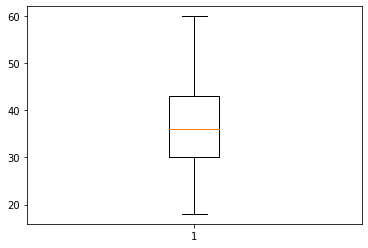

In [20]:
plt.boxplot(dataset.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b56035c88>,
 'caps': [<matplotlib.lines.Line2D at 0x25b56035e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b560354c8>],
 'medians': [<matplotlib.lines.Line2D at 0x25b56038f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b56038fc8>],
 'means': []}

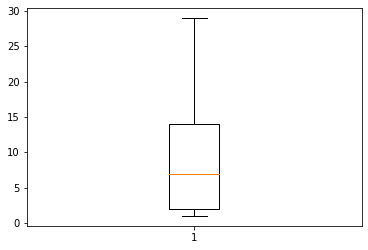

In [21]:
plt.boxplot(dataset.DistanceFromHome)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b560a9408>,
 'caps': [<matplotlib.lines.Line2D at 0x25b560a9cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b560a4948>],
 'medians': [<matplotlib.lines.Line2D at 0x25b560adc48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b560b0ac8>],
 'means': []}

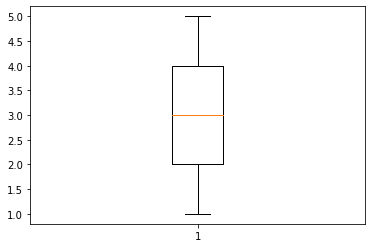

In [22]:
plt.boxplot(dataset.Education)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b56130548>,
 'caps': [<matplotlib.lines.Line2D at 0x25b56130e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b5612da48>],
 'medians': [<matplotlib.lines.Line2D at 0x25b56135f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b56139f48>],
 'means': []}

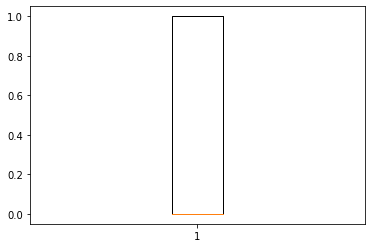

In [23]:
plt.boxplot(dataset.Gender)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b5618fdc8>,
 'caps': [<matplotlib.lines.Line2D at 0x25b56194dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b5618fc08>],
 'medians': [<matplotlib.lines.Line2D at 0x25b56199d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b5619ebc8>],
 'means': []}

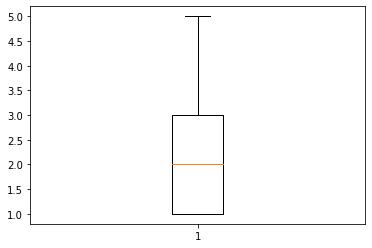

In [24]:
plt.boxplot(dataset.JobLevel)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b56202f88>,
 'caps': [<matplotlib.lines.Line2D at 0x25b56204f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b562024c8>],
 'medians': [<matplotlib.lines.Line2D at 0x25b5620bec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b5620bfc8>],
 'means': []}

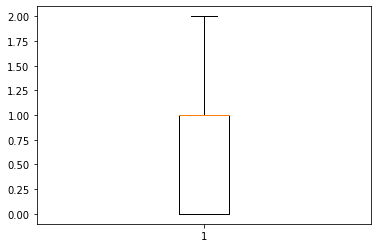

In [25]:
plt.boxplot(dataset.MaritalStatus)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b56273448>,
 'caps': [<matplotlib.lines.Line2D at 0x25b56273d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b5626fa48>],
 'medians': [<matplotlib.lines.Line2D at 0x25b56278dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b5627cdc8>],
 'means': []}

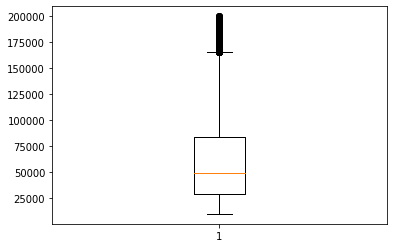

In [26]:
plt.boxplot(dataset.MonthlyIncome)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b562e0348>,
 'caps': [<matplotlib.lines.Line2D at 0x25b562e0c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b562df948>],
 'medians': [<matplotlib.lines.Line2D at 0x25b562e4b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b562eca48>],
 'means': []}

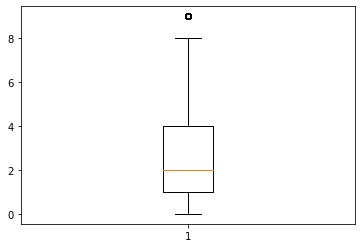

In [27]:
plt.boxplot(dataset.NumCompaniesWorked)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b56347388>,
 'caps': [<matplotlib.lines.Line2D at 0x25b56347c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b56343908>],
 'medians': [<matplotlib.lines.Line2D at 0x25b5634cb08>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b56351988>],
 'means': []}

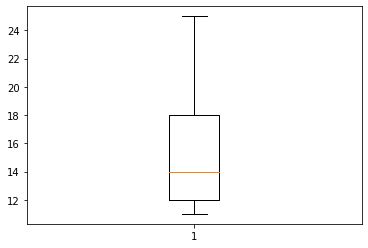

In [28]:
plt.boxplot(dataset.PercentSalaryHike)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b563b2348>,
 'caps': [<matplotlib.lines.Line2D at 0x25b563b2bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b563af888>],
 'medians': [<matplotlib.lines.Line2D at 0x25b563b7b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b563bc9c8>],
 'means': []}

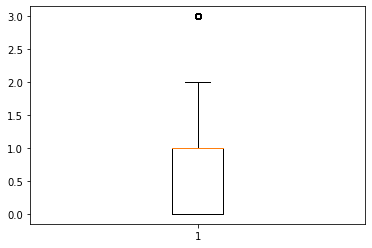

In [29]:
plt.boxplot(dataset.StockOptionLevel)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b5641c608>,
 'caps': [<matplotlib.lines.Line2D at 0x25b5641cec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b56417c08>],
 'medians': [<matplotlib.lines.Line2D at 0x25b56420e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b56426cc8>],
 'means': []}

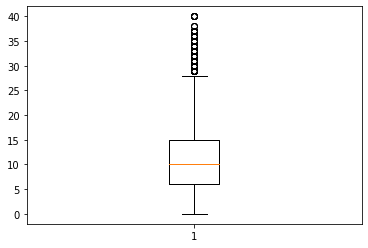

In [30]:
plt.boxplot(dataset.TotalWorkingYears)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b564896c8>,
 'caps': [<matplotlib.lines.Line2D at 0x25b56489ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b56486b48>],
 'medians': [<matplotlib.lines.Line2D at 0x25b5648efc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b56493fc8>],
 'means': []}

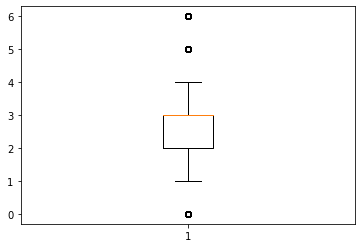

In [31]:
plt.boxplot(dataset.TrainingTimesLastYear)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b564f4988>,
 'caps': [<matplotlib.lines.Line2D at 0x25b564f9948>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b564eeec8>],
 'medians': [<matplotlib.lines.Line2D at 0x25b564fe948>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b564fea48>],
 'means': []}

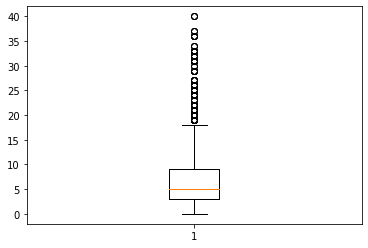

In [32]:
plt.boxplot(dataset.YearsAtCompany)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b56562e88>,
 'caps': [<matplotlib.lines.Line2D at 0x25b56567fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b56562588>],
 'medians': [<matplotlib.lines.Line2D at 0x25b5656bf88>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b565729c8>],
 'means': []}

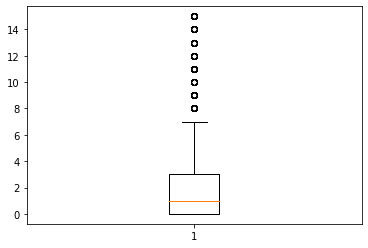

In [33]:
plt.boxplot(dataset.YearsSinceLastPromotion)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b565cfc88>,
 'caps': [<matplotlib.lines.Line2D at 0x25b565d4c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b565cf208>],
 'medians': [<matplotlib.lines.Line2D at 0x25b565dabc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b565dacc8>],
 'means': []}

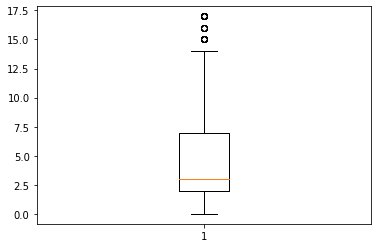

In [34]:
plt.boxplot(dataset.YearsWithCurrManager)

# SKEWNESS ANALYSIS

(array([169., 314., 666., 792., 759., 644., 392., 276., 230., 140.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

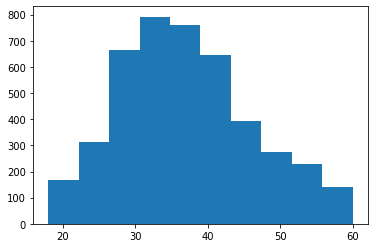

In [35]:
plt.hist(dataset1.Age)

(array([1497.,  559.,  744.,  404.,  118.,  233.,  218.,  191.,  234.,
         184.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

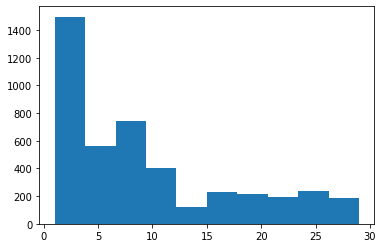

In [36]:
plt.hist(dataset1.DistanceFromHome)

(array([ 508.,    0.,  842.,    0.,    0., 1701.,    0., 1188.,    0.,
         143.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

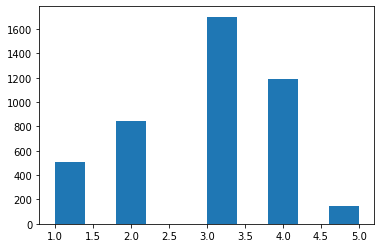

In [37]:
plt.hist(dataset1.Education)

(array([1088., 1041.,  864.,  324.,  326.,  167.,  156.,   54.,  161.,
         201.]),
 array([ 10090.,  29080.,  48070.,  67060.,  86050., 105040., 124030.,
        143020., 162010., 181000., 199990.]),
 <a list of 10 Patch objects>)

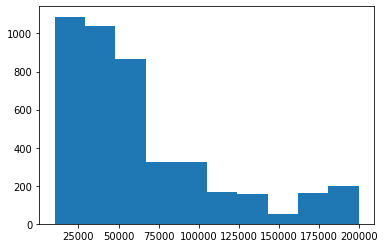

In [38]:
plt.hist(dataset1.MonthlyIncome)

(array([ 584., 1556.,  438.,  474.,  413.,  187.,  208.,  219.,  147.,
         156.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

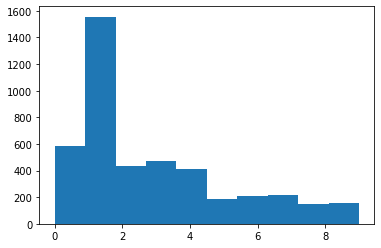

In [39]:
plt.hist(dataset1.NumCompaniesWorked)

(array([1219.,  622.,  899.,  231.,  242.,  494.,  165.,  310.,   83.,
         117.]),
 array([11. , 12.4, 13.8, 15.2, 16.6, 18. , 19.4, 20.8, 22.2, 23.6, 25. ]),
 <a list of 10 Patch objects>)

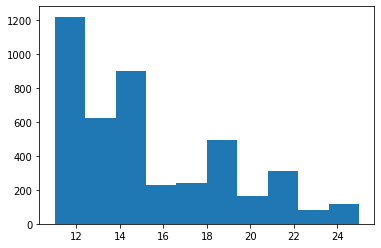

In [40]:
plt.hist(dataset1.PercentSalaryHike)

(array([ 492., 1063., 1299.,  465.,  356.,  318.,  159.,  119.,   72.,
          39.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

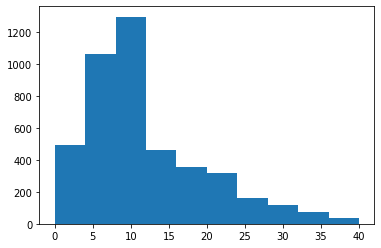

In [41]:
plt.hist(dataset1.TotalWorkingYears)

(array([ 162.,  212.,    0., 1629.,    0., 1466.,  365.,    0.,  354.,
         194.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

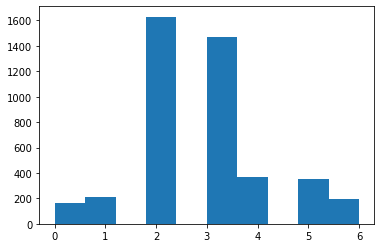

In [42]:
plt.hist(dataset1.TrainingTimesLastYear)

(array([2792.,  477.,  336.,  135.,  322.,   54.,   69.,   71.,   60.,
          66.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

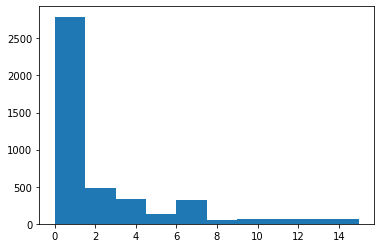

In [43]:
plt.hist(dataset1.YearsSinceLastPromotion)

(array([1009., 1449.,  386.,   85.,  964.,  270.,   66.,   96.,   30.,
          27.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

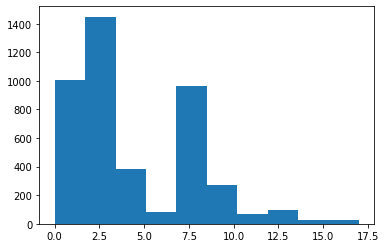

In [44]:
plt.hist(dataset1.YearsWithCurrManager)

## CORRELATION ANALYSIS

## Attrition & Age

In [45]:
stats, p=pearsonr(dataset1.Attrition, dataset1.Age)
print(stats, p)

-0.1583986795409671 5.1265982193780794e-26


## Attrition & DistanceFromHome

In [46]:
stats, p=pearsonr(dataset1.Attrition, dataset1.DistanceFromHome)
print(stats, p)

-0.009448638515156248 0.5317715668019558


## Attrition & MonthlyIncome

In [47]:
stats, p=pearsonr(dataset1.Attrition, dataset1.MonthlyIncome)
print(stats, p)

-0.030160293808460664 0.045890862744719166


## Attrition & NumCompaniesWorked

In [48]:
stats, p=pearsonr(dataset1.Attrition, dataset1.NumCompaniesWorked)
print(stats, p)

0.04283056724472088 0.004572057121620842


## Attrition & PercentSalaryHike

In [49]:
stats, p=pearsonr(dataset1.Attrition, dataset1.PercentSalaryHike)
print(stats, p)

0.03315303713546665 0.028192446935106235


## Attrition & TotalWorkingYears

In [50]:
stats, p=pearsonr(dataset1.Attrition, dataset1.TotalWorkingYears)
print(stats, p)

-0.1696699168472392 1.1645434967091854e-29


## Attrition & TrainingTimesLastYear

In [51]:
stats, p=pearsonr(dataset1.Attrition, dataset1.TrainingTimesLastYear)
print(stats, p)

-0.04758573693081737 0.0016276603635477602


## Attrition & YearsAtCompany

In [52]:
stats, p=pearsonr(dataset1.Attrition, dataset1.YearsAtCompany)
print(stats, p)

-0.1330026184252154 9.476118084836507e-19


## Attrition & YearsSinceLastPromotion

In [53]:
stats, p=pearsonr(dataset1.Attrition, dataset1.YearsSinceLastPromotion)
print(stats, p)

-0.03142315056330995 0.03752293607395154


## Attrition & YearsWithCurrManager

In [54]:
stats, p=pearsonr(dataset1.Attrition, dataset1.YearsWithCurrManager)
print(stats, p)

-0.15469153690287274 7.105369646771178e-25


In [55]:
dataset1.corr()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.158399,-0.025044,0.012117,0.007376,-0.033900,0.008105,0.040625,-0.001137,-0.037018,-0.045163,0.299527,-0.032561,-0.031504,0.680037,-0.028962,0.311281,0.215650,0.201580
Attrition,-0.158399,1.000000,-0.000825,0.044624,-0.009449,-0.017106,-0.004621,-0.018396,-0.012382,0.010886,-0.030160,0.042831,0.033153,-0.008164,-0.169670,-0.047586,-0.133003,-0.031423,-0.154692
BusinessTravel,-0.025044,-0.000825,1.000000,-0.009163,-0.025066,-0.003074,0.003193,-0.038942,-0.045873,0.068735,0.037516,-0.024046,0.030847,-0.005444,-0.033895,0.041538,0.015829,0.033186,0.023134
Department,0.012117,0.044624,-0.009163,1.000000,-0.012095,0.003732,0.001500,0.002680,-0.004290,-0.060554,0.032969,0.004233,0.006823,-0.009522,0.020220,-0.012613,-0.010096,-0.013941,-0.016942
DistanceFromHome,0.007376,-0.009449,-0.025066,-0.012095,1.000000,-0.007491,-0.000326,0.042610,-0.039990,-0.023454,-0.022757,-0.014449,0.037720,0.009353,0.009574,-0.008957,0.030746,0.002243,0.021773
Education,-0.033900,-0.017106,-0.003074,0.003732,-0.007491,1.000000,-0.009389,0.017671,0.045822,-0.004478,0.007289,-0.016210,-0.041054,0.002386,-0.009228,0.009939,0.005997,0.023457,0.005645
EmployeeID,0.008105,-0.004621,0.003193,0.001500,-0.000326,-0.009389,1.000000,0.012812,-0.003090,0.000089,0.007865,0.000719,-0.004877,-0.013488,-0.001688,-0.012102,0.004117,0.000814,0.009079
Gender,0.040625,-0.018396,-0.038942,0.002680,0.042610,0.017671,0.012812,1.000000,0.026019,-0.036240,-0.006805,0.066860,-0.013207,-0.022043,0.028251,0.032597,0.018659,0.023018,-0.002688
JobLevel,-0.001137,-0.012382,-0.045873,-0.004290,-0.039990,0.045822,-0.003090,0.026019,1.000000,0.002421,0.046688,-0.009759,0.010874,0.000365,-0.036293,-0.031931,-0.063360,-0.059680,-0.053898
MaritalStatus,-0.037018,0.010886,0.068735,-0.060554,-0.023454,-0.004478,0.000089,-0.036240,0.002421,1.000000,0.005445,0.032513,0.013213,0.030866,-0.015853,0.010044,-0.015522,-0.036859,-0.015154


# SATISTICAL TEST

## DEPENDENCY TEST(CHI-SQUARE TEST)

In [56]:
from scipy.stats import chi2_contingency

In [57]:
chitable = pd.crosstab(dataset.Attrition,dataset.Age)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

Age        18  19  20  21  22  23  24  25  26   27  ...  51  52  53  54  55  \
Attrition                                           ...                       
0          12   9  15  21  32  30  57  60  80  134  ...  51  44  51  54  57   
1          11  18  18  18  15  12  21  18  36    9  ...   6   9   6   0   9   

Age        56  57  58  59  60  
Attrition                      
0          32  12  27  30  15  
1           9   0  15   0   0  

[2 rows x 43 columns]
352.3011830696416 1.20869585240706e-50


In [58]:
chitable = pd.crosstab(dataset1.Attrition,dataset.BusinessTravel)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

BusinessTravel     0    1    2
Attrition                     
0               2644  621  412
1                465  204   36
70.07594084831368 6.070197027363876e-16


In [59]:
chitable = pd.crosstab(dataset.Attrition,dataset.DistanceFromHome)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

DistanceFromHome   1    2    3    4    5    6    7    8    9    10  ...  20  \
Attrition                                                           ...       
0                 528  513  219  158  162  156  204  206  218  198  ...  65   
1                  94  114   29   32   30   21   48   33   35   60  ...   9   

DistanceFromHome  21  22  23  24  25  26  27  28  29  
Attrition                                             
0                 48  48  68  75  69  72  27  56  69  
1                  6   9  12   9   6   3   9  11  12  

[2 rows x 29 columns]
103.09280258300478 1.5872525392897128e-10


In [60]:
chitable = pd.crosstab(dataset.Attrition,dataset.Gender)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

Gender        0     1
Attrition            
0          2189  1488
1           437   268
1.3825823839528295 0.23966176275638887


In [61]:
chitable = pd.crosstab(dataset.Attrition,dataset.JobLevel)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

JobLevel      1     2    3    4    5
Attrition                           
0          1369  1307  555  267  179
1           250   283   96   51   25
7.036480574687178 0.13397290697032432


In [62]:
chitable = pd.crosstab(dataset.Attrition,dataset.MonthlyIncome)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

MonthlyIncome  10090   10510   10520   10810   10910   11020   11180   11290   \
Attrition                                                                       
0                   0       3       3       3       3       3       3       0   
1                   3       0       0       0       0       0       0       3   

MonthlyIncome  12000   12230   ...  197170  197400  198330  198450  198470  \
Attrition                      ...                                           
0                   3       3  ...       3       3       3       3       3   
1                   0       0  ...       0       0       0       0       0   

MonthlyIncome  198590  199260  199430  199730  199990  
Attrition                                              
0                   0       3       3       3       3  
1                   3       0       0       0       0  

[2 rows x 1349 columns]
4006.81847073142 2.581841223898078e-261


In [63]:
chitable = pd.crosstab(dataset.Attrition,dataset.NumCompaniesWorked)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

NumCompaniesWorked  0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
Attrition                                                            
0                   515  1264  390  426  364  141  160  168  129  120
1                    69   292   48   48   49   46   48   51   18   36
75.85546138415296 1.0708854426925246e-12


In [64]:
chitable = pd.crosstab(dataset.Attrition,dataset.PercentSalaryHike)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

PercentSalaryHike   11   12   13   14   15   16   17   18   19   20   21   22  \
Attrition                                                                       
0                  538  502  522  510  239  202  199  227  186  138  115  138   
1                   90   89  100   87   63   29   43   39   42   27   27   30   

PercentSalaryHike  23  24  25  
Attrition                      
0                  68  54  39  
1                  15   9  15  
19.132665173042696 0.15994173676121282


In [65]:
chitable = pd.crosstab(dataset.Attrition,dataset.StockOptionLevel)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

StockOptionLevel     0     1    2    3
Attrition                             
0                 1564  1509  388  216
1                  316   267   84   38
3.444801419724394 0.32799207189761653


In [66]:
chitable = pd.crosstab(dataset.Attrition,dataset.TotalWorkingYears)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

TotalWorkingYears  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
Attrition                                                                       
0                    18   122    66    99   152   214   307   189   259   255   
1                    14   119    27    27    36    48    65    52    47    30   

TotalWorkingYears  ...  30.0  31.0  32.0  33.0  34.0  35.0  36.0  37.0  38.0  \
Attrition          ...                                                         
0                  ...    21    24    27    18    12     9    18    12     3   
1                  ...     0     3     0     3     3     0     0     0     0   

TotalWorkingYears  40.0  
Attrition                
0                     0  
1                     6  

[2 rows x 40 columns]
360.55237130857233 1.1111356799847907e-53


In [67]:
chitable = pd.crosstab(dataset.Attrition,dataset.YearsAtCompany)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

YearsAtCompany  0    1    2    3    4    5    6    7    8    9   ...  27  29  \
Attrition                                                        ...           
0               84  333  300  322  272  521  200  235  212  219  ...   6   6   
1               47  176   81   59   56   61   27   33   27   24  ...   0   0   

YearsAtCompany  30  31  32  33  34  36  37  40  
Attrition                                       
0                3   6   6  12   3   6   3   0  
1                0   3   3   3   0   0   0   3  

[2 rows x 37 columns]
284.1905063085053 2.434867576146702e-40


In [68]:
chitable = pd.crosstab(dataset.Attrition,dataset.YearsSinceLastPromotion)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

YearsSinceLastPromotion    0    1    2    3    4    5   6    7   8   9   10  \
Attrition                                                                     
0                        1405  916  396  128  166  129  77  179  54  39  15   
1                         325  146   81   27   15    6  18   48   0  12   3   

YearsSinceLastPromotion  11  12  13  14  15  
Attrition                                    
0                        65  30  24  24  30  
1                         6   0   6   3   9  
64.22958433145763 4.66086831785978e-08


In [69]:
chitable = pd.crosstab(dataset.Attrition,dataset.YearsWithCurrManager)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print(stats,p)

YearsWithCurrManager   0    1    2    3    4   5   6    7    8    9   10  11  \
Attrition                                                                      
0                     530  194  878  367  260  81  73  551  290  171  72  63   
1                     252   33  149   55   33  12  12   93   30   18   9   3   

YearsWithCurrManager  12  13  14  15  16  17  
Attrition                                     
0                     54  42   9  15   6  21  
1                      0   0   6   0   0   0  
220.87460913849154 1.7543020110084458e-37


# MANN WHITNEY TEST

In [80]:
from scipy.stats import mannwhitneyu

In [75]:
d1 = dataset1[dataset1['Attrition']==1]
d2 = dataset[dataset['Attrition']==0]

In [76]:
d1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,1,1,1,10,1,0,2,1,1,...,1,41890,0.0,23,1,6.0,3,5,1,4
6,28,1,0,1,11,2,1,7,0,2,...,1,58130,2.0,20,1,5.0,2,0,0,0
13,47,1,2,1,1,1,1,14,0,1,...,0,57620,1.0,11,2,10.0,4,10,9,9
28,44,1,1,1,1,2,1,29,0,2,...,2,103330,3.0,14,1,19.0,2,1,0,0
30,26,1,0,1,4,3,1,31,0,3,...,2,68540,2.0,11,0,5.0,5,3,0,2


In [77]:
d2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,0,0,6,2,0,1,1,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,32,0,1,1,17,4,3,1,3,0,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,2,1,2,5,0,1,4,0,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,0,1,10,1,1,1,5,0,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,0,0,1,8,3,0,1,6,1,...,3.0,Y,13,8,0,28.0,5,7,7,7


In [90]:
stats,p=mannwhitneyu(d1.Age,d2.Age)
print(stats,p)

949178.0 7.98668614365882e-30


In [81]:
stats,p=mannwhitneyu(d1.DistanceFromHome,d2.DistanceFromHome)
print(stats,p)

1295261.0 0.488538986087403


In [92]:
stats,p=mannwhitneyu(d1.BusinessTravel,d2.BusinessTravel)
print(stats,p)

1249881.0 0.029614877291203285


In [89]:
stats,p=mannwhitneyu(d1.Gender,d2.Gender)
print(stats,p)

1264340.5 0.11168342489992195


In [82]:
stats,p=mannwhitneyu(d1.MonthlyIncome,d2.MonthlyIncome)
print(stats,p)

1249573.5 0.06508807631576838


In [83]:
stats,p=mannwhitneyu(d1.NumCompaniesWorked,d2.NumCompaniesWorked)
print(stats,p)

1238814.5 0.02793197853866981


In [84]:
stats,p=mannwhitneyu(d1.PercentSalaryHike,d2.PercentSalaryHike)
print(stats,p)

1231873.5 0.017810794960084964


In [85]:
stats,p=mannwhitneyu(d1.TotalWorkingYears,d2.TotalWorkingYears)
print(stats,p)

895173.5 2.741211827689903e-39


In [86]:
stats,p=mannwhitneyu(d1.YearsAtCompany,d2.YearsAtCompany)
print(stats,p)

912579.0 3.3433144809752036e-36


In [87]:
stats,p=mannwhitneyu(d1.YearsSinceLastPromotion,d2.YearsSinceLastPromotion)
print(stats,p)

1196606.0 0.00037904698157957496


In [88]:
stats,p=mannwhitneyu(d1.YearsWithCurrManager,d2.YearsWithCurrManager)
print(stats,p)

945958.5 5.420302388722274e-31
